In [1]:
import datetime

import matplotlib as mp
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


sns.set()
sns.set_style('whitegrid')
sns.set_style('ticks')

/home/sbuss/envs/sf-planning-pipeline/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# data

In [27]:
year_data['FINALDATE'] = year_data['FINALDATE'].str.strip()

In [30]:
idx = ~pd.isna(year_data['FINALDATE']) & (year_data['FINALDATE'] != '')
year_data.loc[idx, 'FINALDATE']

0        22-MAR-17
1        09-JAN-17
3        14-JAN-17
5        23-JAN-17
6        23-MAY-17
7        25-JAN-17
8        09-JAN-17
9        24-JAN-17
11       06-DEC-17
12       20-JAN-17
13       19-JAN-17
14       25-JAN-17
15       14-MAR-17
16       09-JAN-17
20       19-JAN-17
24       12-JAN-17
25       16-FEB-17
26       13-JAN-17
28       18-MAY-17
29       10-JAN-17
30       13-JAN-17
31       30-JAN-17
32       15-FEB-17
33       11-JAN-17
34       07-JAN-17
35       11-JAN-17
36       13-JAN-17
37       01-JUN-17
38       16-MAY-17
39       16-MAY-17
           ...    
24081    26-JAN-18
24087    09-JAN-18
24088    18-JAN-18
24091    09-JAN-18
24092    10-JAN-18
24094    11-JAN-18
24095    10-JAN-18
24096    29-DEC-17
24098    25-JAN-18
24099    09-JAN-18
24101    26-JAN-18
24102    19-JAN-18
24105    29-JAN-18
24107    09-JAN-18
24108    09-JAN-18
24109    04-JAN-18
24110    09-JAN-18
24111    09-JAN-18
24122    11-JAN-18
24123    10-JAN-18
24129    17-JAN-18
24131    31-

In [46]:
# https://sjpermits.org/permits/general/reportdata.asp
# Column key: https://sjpermits.org/permits/ftproot/SanJose/permitdataMonths/PD_00_Layout.txt

# The Permit Data File is a listing of all permits issued within a
# certain date range.

# Permit Data File in text - This is a text file which can be saved 
# in Notepad or in EXCEL.  One suggestion is to save this file in a 
# folder in your hard drive and rename it with extension .XLS, so 
# you could open it in EXCEL. You can then select and copy/paste 
# any or all of the fields onto a new EXCEL worksheet.  You can 
# sort this file by whatever field you choose. The description of
# the fields are shown below.

# Permit Data File in EXCEL format - It contains the following 
# fields (with letters indicating the EXCEL columns):
# -A Tract
# -B APN
# -C Issue Date
# --added Final Date
# -D Lot
# -E Permit Number/ Folder Number
# -F Owner - not displayed any more
# -G Contractor
# -H Applicant
# -I Job Location / Brief Description of Job
# -J PermitApprovals
# -K SubCode
# -L SubCode Description
# -M WorkCode
# -N WorkCode Description
# -O Census Code
# -P Permit Valuation
# -Q Reroof Valuation
# -R Sq Ft
# -S Dwelling Units
# -T FolderRSN (record id)
# -U Swimming pool y/n
# -V Sewer y/n
# -W Enterprise y/n
# -X Permit Flag Building, Plumbing, Mechanical, Electrical

df = None
for year in range(2001, 2018):
    print(year)
    for ext in ['txt', 'TXT']:
        try:
            year_data = pd.read_csv('san-jose/data/PD_%s_ISSUE.%s' % (year, ext),
                                    delimiter='\t',
                                    header=0,
                                    parse_dates=[
                                        'ISSUEDATE',
                                        #'FINALDATE',
                                    ],
                                    infer_datetime_format=True,
                                    error_bad_lines=False,
                                    warn_bad_lines=True)
        except:
            continue
        else:
            break
#     if isinstance(year_data.iloc[0].ISSUEDATE, str):
#         for date_format in ['%m/%d/%Y %I:%M:S %p', '%d-%b-%y']:
#             year_data['ISSUEDATE'] = pd.to_datetime(year_data['ISSUEDATE'], format=date_format, infer_datetime_format=True)
#             if not isinstance(year_data.iloc[0].ISSUEDATE, str):
#                 break
#     year_data['FINALDATE'] = year_data['FINALDATE'].str.strip()
#     idx = ~pd.isna(year_data['FINALDATE']) & (year_data['FINALDATE'] != '')
#     if isinstance(year_data.loc[idx, 'FINALDATE'][0], str):
#         print("yeah")
#         for date_format in ['%m/%d/%Y %I:%M:S %p', '%d-%b-%y']:
#             year_data.loc[idx, 'FINALDATE'] = pd.to_datetime(year_data.loc[idx, 'FINALDATE'], format=date_format, infer_datetime_format=True)
#             if not isinstance(year_data.loc[idx].iloc[0].FINALDATE, str):
#                 break
    #print(year_data.iloc[0, 'ISSUEDATE'], year_data.iloc[0, 'FINALDATE'])
    if df is None:
        df = year_data
    else:
        df = df.append(year_data)

2001
2002
2003
2004
2005
2006
2007
2008


Skipping line 7675: expected 25 fields, saw 26
Skipping line 11977: expected 25 fields, saw 26



2009


Skipping line 309: expected 25 fields, saw 27
Skipping line 567: expected 25 fields, saw 26
Skipping line 2196: expected 25 fields, saw 26



2010
2011


Skipping line 8331: expected 25 fields, saw 26



2012
2013
2014
2015


Skipping line 21672: expected 25 fields, saw 26



2016


Skipping line 916: expected 25 fields, saw 26
Skipping line 3903: expected 25 fields, saw 26
Skipping line 10267: expected 25 fields, saw 26
Skipping line 19242: expected 25 fields, saw 26
Skipping line 19244: expected 25 fields, saw 26
Skipping line 20591: expected 25 fields, saw 26
Skipping line 20593: expected 25 fields, saw 26
Skipping line 20594: expected 25 fields, saw 26
Skipping line 20722: expected 25 fields, saw 26



2017


Skipping line 294: expected 25 fields, saw 26



In [47]:
data = df

In [48]:
def quarter(dt):
    if pd.isna(dt):
        return ""
    return "%s Q%s" % (dt.year, int(np.ceil((dt.month-1)/3)) + 1)


def half(dt):
    if pd.isna(dt):
        return ""
    return "%s H%s" % (dt.year, int(np.ceil((dt.month-1)/6)) + 1)


def monthyear(dt):
    if pd.isna(dt):
        return ""
    return "%s %s" % (dt.year, dt.strftime("%b"))

data['_year'] = data['ISSUEDATE'].apply(lambda dt: str(dt.year))
data['_quarter'] = data['ISSUEDATE'].apply(quarter)
data['_half'] = data['ISSUEDATE'].apply(half)
data['_month'] = data['ISSUEDATE'].apply(monthyear)

# Exploration

In [240]:
def latest_first_filings(data, min_year=0, max_year=0, id_field='APN', datefield='ISSUEDATE', unitfield='DWELLUNITS'):
    min_year = min_year or data[datefield].min().year
    max_year = max_year or data[datefield].max().year + 1
    # first_seen is a hack to solve this issue:
    # multiple permit numbers are given to the same project on a given blocklot,
    # so there is a lot of duplication. first_seen is a heuristic that is basically:
    # "if a permit was filed to develop a parcel after 1995, we should consider that
    # one long-running project"
    #
    # This is needed so that we don't count a permit that, eg, was submitted in 2005
    # and re-submitted in 2008 as separate projects.
    #
    # It also ignore permits that don't have any proposed units, as those can be
    # considered preliminary permits
    first_seen = data[(data[datefield] > datetime.datetime(2001,1,1)) &
                      (data[unitfield] > 0)].groupby([id_field]).aggregate({
        datefield: 'min'
    })

    # Build a new data frame that only consists of the very first time the project was seen
    first_filings = pd.DataFrame(columns=data.columns)
    num_filings = []
    
    ## The next line is where this differs with first_filings; it goes from most recent to oldest
    for year in range(max_year, min_year+1, -1):
        filed_in_year = data[
            (data[datefield] < datetime.datetime(year+1,1,1)) &
            (data[datefield] > datetime.datetime(year,1,1)) &
            (~data[id_field].isin(first_filings[id_field]))]
            #(~data[id_field].isin(first_seen[first_seen[datefield] < datetime.datetime(year,1,1)].index))]
        num_filings.append(len(filed_in_year))
        first_filings = first_filings.append(filed_in_year)
    
    first_filings = first_filings.drop_duplicates([id_field])

    return first_filings

In [91]:
def first_filings(data, min_year=0, max_year=0, id_field='APN', datefield='ISSUEDATE', unitfield='DWELLUNITS'):
    min_year = min_year or data[datefield].min().year
    max_year = max_year or data[datefield].max().year + 1
    # first_seen is a hack to solve this issue:
    # multiple permit numbers are given to the same project on a given blocklot,
    # so there is a lot of duplication. first_seen is a heuristic that is basically:
    # "if a permit was filed to develop a parcel after 1995, we should consider that
    # one long-running project"
    #
    # This is needed so that we don't count a permit that, eg, was submitted in 2005
    # and re-submitted in 2008 as separate projects.
    #
    # It also ignore permits that don't have any proposed units, as those can be
    # considered preliminary permits
    first_seen = data[(data[datefield] > datetime.datetime(2001,1,1)) &
                      (data[unitfield] > 0)].groupby([id_field]).aggregate({
        datefield: 'min'
    })

    # Build a new data frame that only consists of the very first time the project was seen
    first_filings = pd.DataFrame(columns=data.columns)
    num_filings = []
    for year in range(min_year+1, max_year):
        filed_in_year = data[
            (data[datefield] < datetime.datetime(year+1,1,1)) &
            (data[datefield] > datetime.datetime(year,1,1)) &
            (~data[id_field].isin(first_filings[id_field]))]
            #(~data[id_field].isin(first_seen[first_seen[datefield] < datetime.datetime(year,1,1)].index))]
        num_filings.append(len(filed_in_year))
        first_filings = first_filings.append(filed_in_year)
    
    first_filings = first_filings.drop_duplicates([id_field])

    return first_filings

In [92]:
ff = first_filings(data)

In [93]:
len(ff)

96089

# Analysis

In [98]:
before = ff[ff.ISSUEDATE < datetime.datetime(2016,7,1)]  # Before Prop C
after = ff[ff.ISSUEDATE >= datetime.datetime(2016,7,1)]  # After Prop C

## All projects with some market-rate units

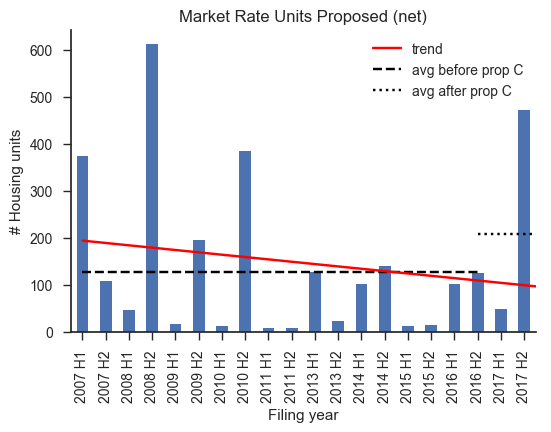

In [100]:
_ff = ff[ff.DWELLUNITS > 0]

mrk_data = _ff.groupby('_half').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data.DWELLUNITS.values.tolist()
params = np.polyfit(range(len(d)), d, 1)
poly = np.poly1d(params)

mrk_data_before = before.groupby('_half').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data_before.DWELLUNITS.values.tolist()
offset = len(d)
avg_before = np.mean(d)

mrk_data_after = after.groupby('_half').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data_after.DWELLUNITS.values.tolist()
avg_after = np.mean(d)

f = mp.pyplot.figure()
ax = f.gca()
p = mrk_data.plot.bar(ax=ax)
p.set_label("_nolegend_")

xp = np.linspace(0, len(mrk_data.DWELLUNITS.values), 20)
l1 = ax.plot(xp, poly(xp), label='trend', color='red')
l2 = ax.hlines(avg_before, 0, offset, label='avg before', linestyles='dashed')
l3 = ax.hlines(avg_after, offset, len(d) + offset, label='avg after', linestyles='dotted')
mp.pyplot.title("Market Rate Units Proposed (net)")
ax.set_ylabel("# Housing units")
ax.set_xlabel("Filing year")
#ax.legend()
ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
sns.despine()
f.set_dpi(100)
#f.savefig("figs/market-rate-net.png", dpi=300, bbox_inches='tight')

## All Affordable units

## Break down by project type

The percentage of subsidized affordable units mandated by law varies according to the size of the project:

* Fewer than 10 units: 0%
* Fewer than 25 units: 12%
* 25 or more units: 20%

The old requirement was a flat 12% on projects with more than 10 units, so we can compare the classes of projects to get an estimate for the impact of Prop C.

In [234]:
_lff = latest_first_filings(data)

/home/sbuss/envs/sf-planning-pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
/home/sbuss/envs/sf-planning-pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  import sys
/home/sbuss/envs/sf-planning-pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
/home/sbuss/envs/sf-planning-pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':
/home/sbuss/envs/sf-planning-pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  # Remove the CWD from sys.path while we load stuff.


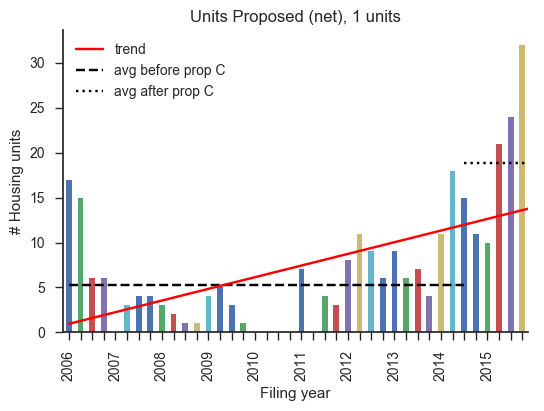

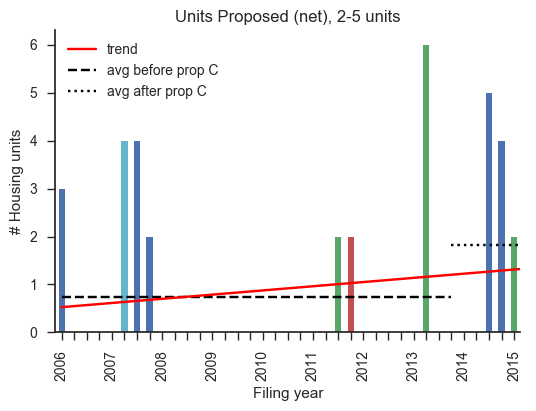

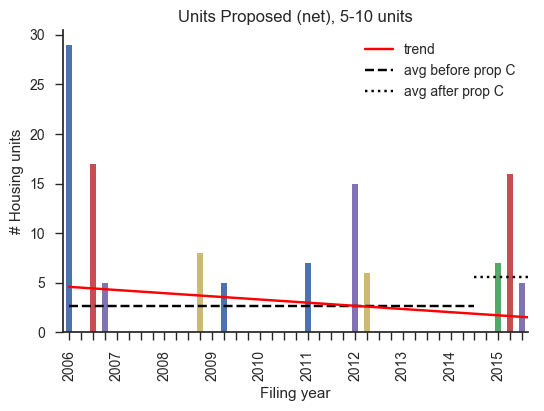

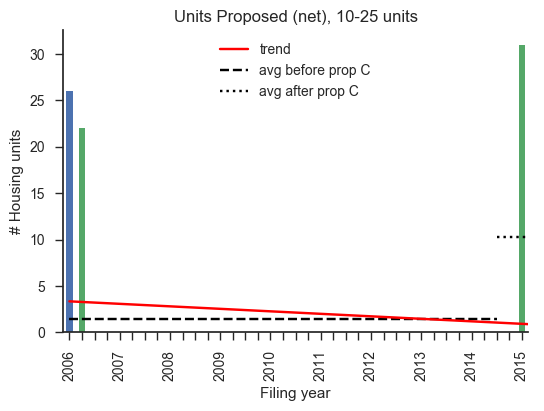

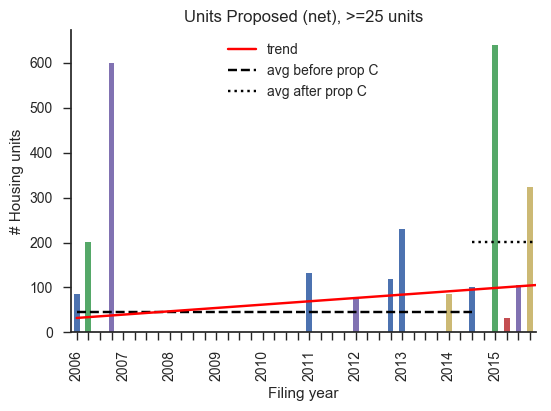

In [239]:
xd = pd.DataFrame(_lff['DWELLUNITS'].copy())
xd = xd.set_index(pd.DatetimeIndex(_lff.ISSUEDATE))
# Incomplete data prior to 2007
xd = xd.loc[xd.index >= datetime.datetime(2007,1,1)]

r1 = xd[(xd.DWELLUNITS > 0) & (xd.DWELLUNITS < 2)].DWELLUNITS.resample('Q', how='sum')
r2 = xd[(xd.DWELLUNITS >= 2) & (xd.DWELLUNITS < 5)].DWELLUNITS.resample('Q', how='sum')
r5 = xd[(xd.DWELLUNITS >= 5) & (xd.DWELLUNITS < 10)].DWELLUNITS.resample('Q', how='sum')
r10 = xd[(xd.DWELLUNITS >= 10) & (xd.DWELLUNITS < 25)].DWELLUNITS.resample('Q', how='sum')
r25 = xd[(xd.DWELLUNITS >= 25)].DWELLUNITS.resample('Q', how='sum')

rs = {
    '1': r1,
    '2-5': r2,
    '5-10': r5,
    '10-25': r10,
    '>=25': r25,
}

for c, _project_type in enumerate(['1', '2-5', '5-10', '10-25', '>=25']):
    _mrk = rs[_project_type]
    _mrk_before = _mrk.loc[_mrk.index < datetime.datetime(2016,7,1)]  # Before Prop C
    _mrk_after = _mrk.loc[_mrk.index >= datetime.datetime(2016,7,1)]  # After Prop C

    d = _mrk.values.tolist()
    params = np.polyfit(range(len(d)), d, 1)
    poly = np.poly1d(params)

    d = _mrk_before.values.tolist()
    offset = len(d)
    avg_before = np.mean(d)

    d = _mrk_after.values.tolist()
    avg_after = np.mean(d)
    f = mp.pyplot.figure()
    ax = f.gca()
    
    p = _mrk.plot.bar(ax=ax)

    xp = np.linspace(0, len(_mrk.values), 20)
    l1 = ax.plot(xp, poly(xp), label='trend', color='red')
    l2 = ax.hlines(avg_before, 0, offset, label='avg before', linestyles='dashed')
    l3 = ax.hlines(avg_after, offset, len(d) + offset, label='avg after', linestyles='dotted')
    ax.set_xlabel("%s%% Affordable" % _project_type)

    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(r.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%Y') for item in r.index[::4]]
    # Every 12th ticklabel includes the year
    #ticklabels[::12] = [item.strftime('%Y-%b %d\n%Y') for item in r.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    
    #ax.legend()
    mp.pyplot.title("Units Proposed (net), %s units" % _project_type)
    ax.set_ylabel("# Housing units")
    ax.set_xlabel("Filing year")
    #ax.legend()
    ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
    sns.despine()
    if c == 0:
        ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
    sns.despine()
    f.set_dpi(100)
    #f.savefig("figs/market-rate-net-%s-affordable.png" % _project_type, dpi=100, bbox_inches='tight')